<a href="https://colab.research.google.com/github/Mishak7/Finance/blob/main/Financial_Econometrics_Seminar_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

fama = pd.read_excel('/content/drive/MyDrive/HSE/fama_french.xlsx')
cam = pd.read_excel('/content/drive/MyDrive/HSE/cam_shiller.xlsx')

Mounted at /content/drive


#### Loading the data

In [ ]:
fama

,datevec,smb,hml,rf,mom,r1,r2,r3,r4,r5,...,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,ind10,mktrf
0,1926-07-01,-2.50,-2.67,0.22,NaN,5.83,-10.14,-0.41,-1.41,-0.66,...,15.61,4.65,-1.17,2.90,0.83,0.11,1.64,7.13,2.15,2.95
1,1926-08-01,-1.20,4.50,0.25,NaN,-2.03,-4.29,2.42,1.21,4.92,...,3.64,2.80,3.31,2.66,2.17,-0.69,4.51,-1.70,4.38,2.63
2,1926-09-01,-1.33,-0.30,0.23,NaN,-4.88,-2.48,-6.16,3.09,0.75,...,4.88,1.23,-3.37,-0.38,2.41,0.18,0.61,2.03,0.28,0.38
3,1926-10-01,-0.13,0.79,0.32,NaN,-9.39,-6.62,-5.16,0.04,-3.40,...,-8.22,-3.62,-0.79,-4.58,-0.11,-2.31,-0.73,-2.64,-2.85,-3.24
4,1926-11-01,-0.24,-0.39,0.31,NaN,5.63,5.32,2.02,-3.37,1.44,...,-0.20,4.15,-0.01,4.71,1.63,6.40,5.53,3.72,2.10,2.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2013-08-01,0.28,-2.46,0.00,0.05,-2.34,-2.85,-3.49,-3.53,-2.71,...,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,-2.69
1046,2013-09-01,2.85,-1.52,0.00,3.02,7.31,8.06,6.49,6.81,6.30,...,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,3.76
1047,2013-10-01,-1.53,1.39,0.00,0.16,-0.32,0.56,2.88,3.73,3.07,...,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,4.17
1048,2013-11-01,1.31,-0.38,0.00,0.37,7.56,6.58,5.89,6.57,4.32,...,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74,3.12


#### Deleting r1-r25, it seems that we do not need them

In [ ]:
columns_to_drop = [f'r{i}' for i in range(1, 26)]
fama = fama.drop(columns=columns_to_drop)

#### Renaming and calculating excesses for industries

In [ ]:
industry_names = ['NonDur','Dur','Manuf','Energy','Tech','Telecom','Retail', 'Health','Util','Other']

rename_dict = {f'ind{i+1}': industry_names[i] for i in range(10)}
fama_renamed = fama.rename(columns=rename_dict)

for industry in industry_names:
    fama_renamed[f'{industry}_excess'] = fama_renamed[industry] - fama_renamed['rf']

factor_rename = {
    'mktrf': 'EMKT',
    'smb': 'SMB',
    'hml': 'HML',
    'mom': 'MOM'
}
fama_renamed = fama_renamed.rename(columns=factor_rename)

fama_clean = fama_renamed.dropna(subset=['EMKT', 'SMB', 'HML', 'MOM'])
fama_clean

,datevec,SMB,HML,rf,MOM,NonDur,Dur,Manuf,Energy,Tech,...,NonDur_excess,Dur_excess,Manuf_excess,Energy_excess,Tech_excess,Telecom_excess,Retail_excess,Health_excess,Util_excess,Other_excess
6,1927-01-01,-0.17,4.86,0.25,0.49,-0.67,-0.91,-0.05,1.20,-1.13,...,-0.92,-1.16,-0.30,0.95,-1.38,1.63,-2.78,4.66,-2.04,1.25
7,1927-02-01,0.37,3.26,0.26,-0.69,3.42,8.88,5.80,1.42,4.45,...,3.16,8.62,5.54,1.16,4.19,3.71,3.32,1.39,4.31,4.79
8,1927-03-01,-1.62,-2.62,0.30,5.41,2.76,1.65,1.44,-5.95,1.45,...,2.46,1.35,1.14,-6.25,1.15,5.26,-0.76,0.58,0.07,0.97
9,1927-04-01,0.25,0.66,0.25,3.83,3.37,3.17,0.81,-5.11,5.40,...,3.12,2.92,0.56,-5.36,5.15,-2.38,4.15,3.00,1.46,0.65
10,1927-05-01,1.34,4.65,0.30,3.73,8.18,5.92,5.07,4.79,7.37,...,7.88,5.62,4.77,4.49,7.07,3.05,2.04,3.71,8.92,6.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2013-08-01,0.28,-2.46,0.00,0.05,-4.00,-1.00,-1.95,-1.83,-0.12,...,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
1046,2013-09-01,2.85,-1.52,0.00,3.02,1.94,6.46,5.20,2.03,3.77,...,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
1047,2013-10-01,-1.53,1.39,0.00,0.16,4.75,0.72,4.56,4.86,3.80,...,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
1048,2013-11-01,1.31,-0.38,0.00,0.37,1.29,1.81,2.95,0.85,3.65,...,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


#### Regressions for industries and output

In [ ]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

factors = ['EMKT', 'SMB', 'HML', 'MOM']
X = sm.add_constant(fama_clean[factors])

results = {}

for industry in industry_names:
    y = fama_clean[f'{industry}_excess']
    model = sm.OLS(y, X).fit()
    results[industry] = model

print(summary_col(list(results.values()),
                 model_names=list(results.keys()),
                 stars=True,
                 regressor_order=['const', 'EMKT', 'SMB', 'HML', 'MOM'],
                 info_dict={'N':lambda x: f"{int(x.nobs)}",
                           'R2':lambda x: f"{x.rsquared:.4f}"}))


                 NonDur     Dur       Manuf     Energy      Tech     Telecom     Retail     Health      Util      Other   
--------------------------------------------------------------------------------------------------------------------------
const          0.1786**  0.0889     -0.0117   0.0718     0.1900**   0.2582***  0.1701**   0.2968***  0.0074     -0.1411** 
               (0.0706)  (0.1228)   (0.0547)  (0.1186)   (0.0914)   (0.0940)   (0.0867)   (0.1056)   (0.1112)   (0.0602)  
EMKT           0.7674*** 1.1723***  1.1041*** 0.8949***  1.2424***  0.6779***  0.9596***  0.8925***  0.7768***  1.0425*** 
               (0.0140)  (0.0243)   (0.0108)  (0.0235)   (0.0181)   (0.0186)   (0.0172)   (0.0209)   (0.0220)   (0.0119)  
SMB            -0.0315   0.0338     -0.0013   -0.2103*** 0.0978***  -0.1398*** 0.0752***  -0.1049*** -0.1798*** 0.0642*** 
               (0.0223)  (0.0388)   (0.0173)  (0.0374)   (0.0289)   (0.0297)   (0.0274)   (0.0333)   (0.0351)   (0.0190)  
HML            

#### Based on the table, we see that the model explains some of the industries perfomance quite well (not significant constant), some show the return lower or higher than the model expect.
#### Most of the coefficients seem to be logically correct - for example, positive SMB for Tech, negative SMB for Energy, positive HML for Manuf, Energy and so on.

#### Visuzalization of results

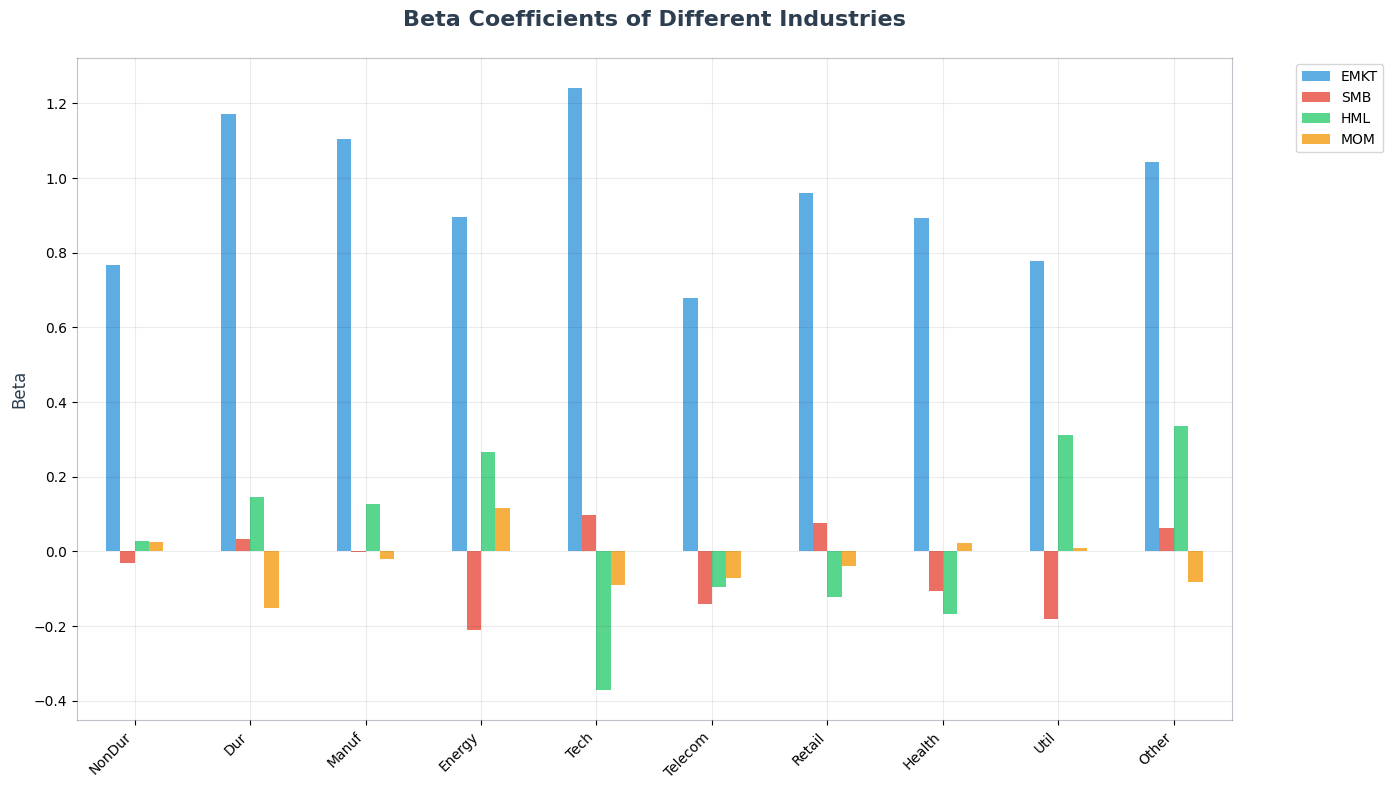

In [ ]:
import matplotlib.pyplot as plt

betas_data = []
for industry, model in results.items():
    betas_data.append({
        'Industry': industry,
        'EMKT': model.params['EMKT'],
        'SMB': model.params['SMB'],
        'HML': model.params['HML'],
        'MOM': model.params['MOM']
    })

betas_fama = pd.DataFrame(betas_data)

plt.figure(figsize=(14, 8))
ax = betas_fama.set_index('Industry').plot(kind='bar',
                                          color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'],
                                          alpha=0.8,
                                          ax=plt.gca())

plt.title('Beta Coefficients of Different Industries\n',
          fontsize=16, fontweight='bold', color='#2c3e50')
plt.ylabel('Beta', fontsize=12, color='#2c3e50')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

ax.set_xlabel('')
ax.set_facecolor('white')
ax.grid(True, color='#2c3e50', alpha=0.1)

for spine in ax.spines.values():
    spine.set_edgecolor('#2c3e50')
    spine.set_alpha(0.3)

plt.tight_layout()
plt.show()


#### Calculating Sharpe, Treynor, Jensen for all industries

In [ ]:
performance_data = []

for industry in industry_names:
    excess_returns = fama_clean[f'{industry}_excess']

    market_excess = fama_clean['EMKT']

    X_capm = sm.add_constant(market_excess)
    y_industry = excess_returns
    capm_model = sm.OLS(y_industry, X_capm).fit()
    beta = capm_model.params['EMKT']

    mu_p = fama_clean[industry].mean()
    mu_m = (fama_clean['EMKT'] + fama_clean['rf']).mean()
    rf_mean = fama_clean['rf'].mean()
    sigma_p = excess_returns.std()


    sharpe_ratio = (mu_p - rf_mean) / sigma_p if sigma_p != 0 else 0
    treynor_index = (mu_p - rf_mean) / beta if beta != 0 else 0
    jensen_alpha = (mu_p - rf_mean) - beta * (mu_m - rf_mean)

    performance_data.append({
        'Industry': industry,
        'Mean_Return': mu_p,
        'Excess_Return': mu_p - rf_mean,
        'Volatility': sigma_p,
        'Beta': beta,
        'Sharpe_Ratio': sharpe_ratio,
        'Treynor_Index': treynor_index,
        'Jensen_Alpha': jensen_alpha
    })

performance_fama = pd.DataFrame(performance_data)

#### Visualization of results

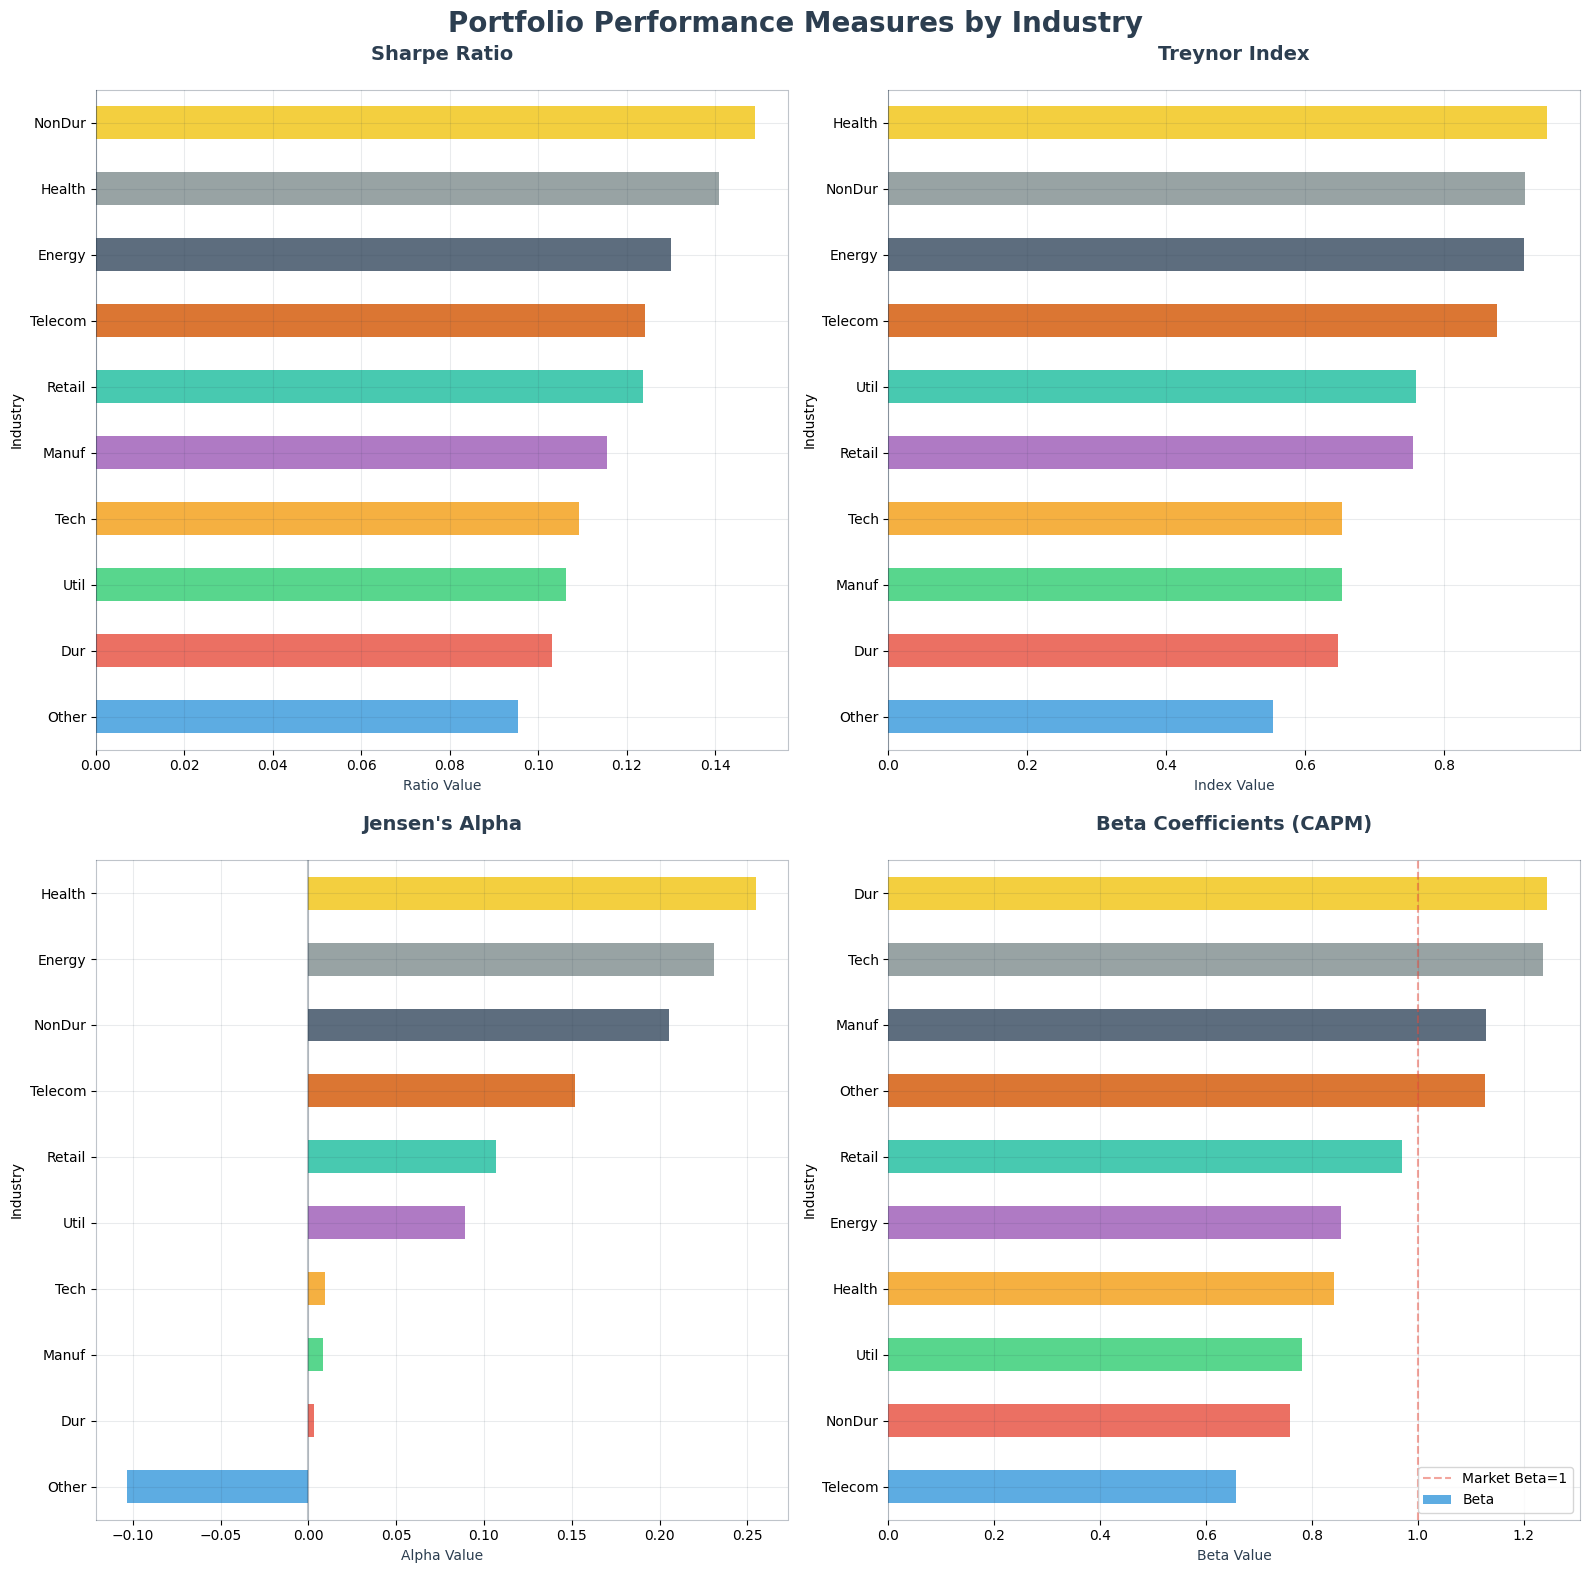

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Portfolio Performance Measures by Industry\n\n\n',
             fontsize=20, fontweight='bold', color='#2c3e50')

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6',
          '#1abc9c', '#d35400', '#34495e', '#7f8c8d', '#f1c40f']

performance_fama.sort_values('Sharpe_Ratio', ascending=True).plot(
    kind='barh', x='Industry', y='Sharpe_Ratio',
    ax=axes[0,0], color=colors, alpha=0.8, legend=False
)
axes[0,0].set_title('Sharpe Ratio\n', fontsize=14, fontweight='bold', color='#2c3e50')
axes[0,0].set_xlabel('Ratio Value', fontsize=10, color='#2c3e50')
axes[0,0].set_facecolor('white')
axes[0,0].grid(True, color='#2c3e50', alpha=0.1)
axes[0,0].axvline(x=0, color='#2c3e50', alpha=0.3, linestyle='-')

performance_fama.sort_values('Treynor_Index', ascending=True).plot(
    kind='barh', x='Industry', y='Treynor_Index',
    ax=axes[0,1], color=colors, alpha=0.8, legend=False
)
axes[0,1].set_title('Treynor Index\n', fontsize=14, fontweight='bold', color='#2c3e50')
axes[0,1].set_xlabel('Index Value', fontsize=10, color='#2c3e50')
axes[0,1].set_facecolor('white')
axes[0,1].grid(True, color='#2c3e50', alpha=0.1)
axes[0,1].axvline(x=0, color='#2c3e50', alpha=0.3, linestyle='-')

performance_fama.sort_values('Jensen_Alpha', ascending=True).plot(
    kind='barh', x='Industry', y='Jensen_Alpha',
    ax=axes[1,0], color=colors, alpha=0.8, legend=False
)
axes[1,0].set_title("Jensen's Alpha\n", fontsize=14, fontweight='bold', color='#2c3e50')
axes[1,0].set_xlabel('Alpha Value', fontsize=10, color='#2c3e50')
axes[1,0].set_facecolor('white')
axes[1,0].grid(True, color='#2c3e50', alpha=0.1)
axes[1,0].axvline(x=0, color='#2c3e50', alpha=0.3, linestyle='-')

performance_fama.sort_values('Beta', ascending=True).plot(
    kind='barh', x='Industry', y='Beta',
    ax=axes[1,1], color=colors, alpha=0.8, legend=False
)
axes[1,1].set_title('Beta Coefficients (CAPM)\n', fontsize=14, fontweight='bold', color='#2c3e50')
axes[1,1].set_xlabel('Beta Value', fontsize=10, color='#2c3e50')
axes[1,1].set_facecolor('white')
axes[1,1].grid(True, color='#2c3e50', alpha=0.1)
axes[1,1].axvline(x=1, color='#e74c3c', alpha=0.5, linestyle='--', label='Market Beta=1')
axes[1,1].legend()

for ax in axes.flat:
    for spine in ax.spines.values():
        spine.set_edgecolor('#2c3e50')
        spine.set_alpha(0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

#### We see that such industries as Non-durables, Energy, Health are at the top for Sharpe, meaning return to general risk, Treynor, meaning return to systematic risk, and for Jensen's alpha, meaning return over CAPM.

# Question 2

In [ ]:
from statsmodels.tsa.api import VAR
cam

,dates,div,stock
0,1933-01-01,0.4950,7.09
1,1933-02-01,0.4900,6.25
2,1933-03-01,0.4850,6.23
3,1933-04-01,0.4800,6.89
4,1933-05-01,0.4750,8.87
...,...,...,...
691,1990-08-01,11.7833,330.75
692,1990-09-01,11.8400,315.41
693,1990-10-01,11.9267,307.12
694,1990-11-01,12.0133,315.29


#### OLS estimation for calculation of present value model deviations

In [ ]:
cam['p_t'] = np.log(cam['stock'])
cam['d_t'] = np.log(cam['div'])
cam['y_t'] = (cam['div'] / cam['stock']) * 100

X_a = sm.add_constant(cam['d_t'])
y_a = cam['p_t']

model_a = sm.OLS(y_a, X_a).fit()
alpha_hat = model_a.params['d_t']
beta_hat = model_a.params['const']

print("="*60)
print("Part (a): Parameter estimation α")
print("="*60)
print(f"α: {alpha_hat:.6f}")
print(f"β: {beta_hat:.6f}")
print(f"R²: {model_a.rsquared:.4f}")

cam

Part (a): Parameter estimation α
α: 1.118562
β: 3.070734
R²: 0.9446


,dates,div,stock,p_t,d_t,y_t
0,1933-01-01,0.4950,7.09,1.958685,-0.703198,6.981664
1,1933-02-01,0.4900,6.25,1.832581,-0.713350,7.840000
2,1933-03-01,0.4850,6.23,1.829376,-0.723606,7.784912
3,1933-04-01,0.4800,6.89,1.930071,-0.733969,6.966618
4,1933-05-01,0.4750,8.87,2.182675,-0.744440,5.355130
...,...,...,...,...,...,...
691,1990-08-01,11.7833,330.75,5.801363,2.466683,3.562600
692,1990-09-01,11.8400,315.41,5.753873,2.471484,3.753844
693,1990-10-01,11.9267,307.12,5.727239,2.478780,3.883401
694,1990-11-01,12.0133,315.29,5.753493,2.486014,3.810238


#### Visualization of OLS and deviations

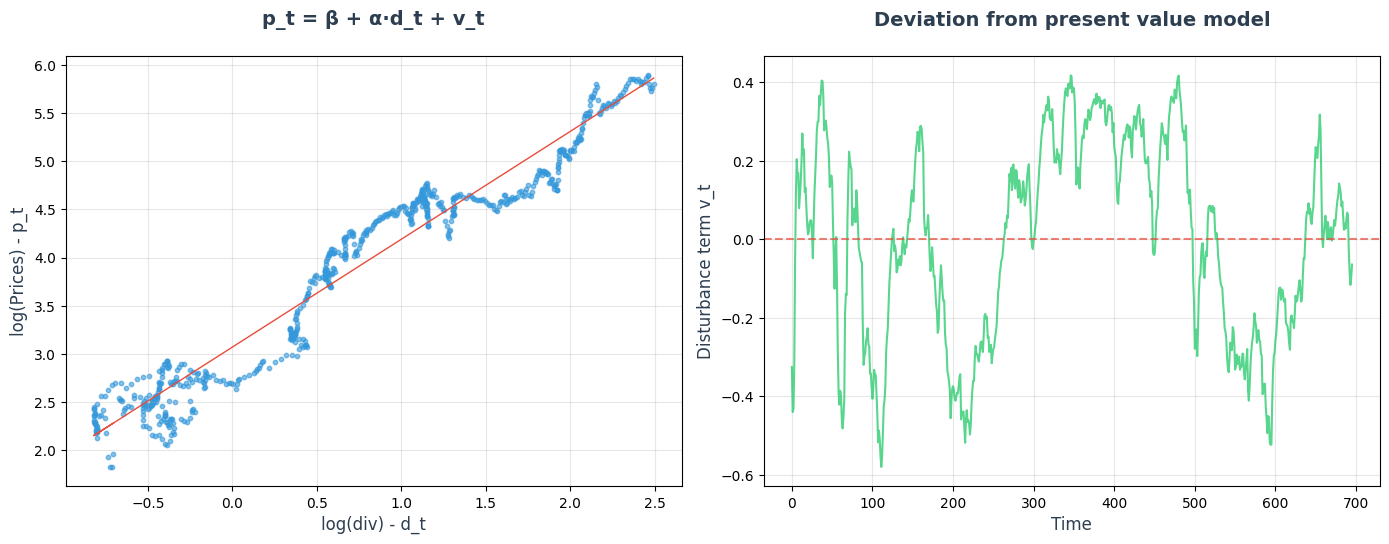

In [ ]:
cam['v_t'] = model_a.resid

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.scatter(cam['d_t'], cam['p_t'], alpha=0.6, color='#3498db', s=10)
plt.plot(cam['d_t'], model_a.fittedvalues, color='#e74c3c', linewidth=1)
plt.xlabel('log(div) - d_t', fontsize=12, color='#2c3e50')
plt.ylabel('log(Prices) - p_t', fontsize=12, color='#2c3e50')
plt.title('p_t = β + α·d_t + v_t\n', fontsize=14, fontweight='bold', color='#2c3e50')
plt.grid(True, alpha=0.3)
plt.gca().set_facecolor('white')

plt.subplot(2, 2, 2)
plt.plot(cam.index, cam['v_t'], color='#2ecc71', alpha=0.8)
plt.axhline(y=0, color='#e74c3c', linestyle='--', alpha=0.7)
plt.xlabel('Time', fontsize=12, color='#2c3e50')
plt.ylabel('Disturbance term v_t', fontsize=12, color='#2c3e50')
plt.title('Deviation from present value model\n', fontsize=14, fontweight='bold', color='#2c3e50')
plt.grid(True, alpha=0.3)
plt.gca().set_facecolor('white')

plt.tight_layout()
plt.show()

#### Building VAR

In [ ]:
var_data = cam[['y_t', 'v_t']].dropna()

model_var = VAR(var_data)
results_var = model_var.fit(1)

print("\n" + "="*60)
print("Part (b): Estimation of VAR(1) model")
print("="*60)
print(results_var.summary())

phi_10 = results_var.params.iloc[0, 0]
phi_20 = results_var.params.iloc[0, 1]

phi_11 = results_var.params.iloc[1, 0]
phi_12 = results_var.params.iloc[1, 1]
phi_21 = results_var.params.iloc[2, 0]
phi_22 = results_var.params.iloc[2, 1]
print(f"\nParameters VAR(1):")
print(f"φ₁₀ = {phi_10:.6f}")
print(f"φ₂₀ = {phi_20:.6f}")
print(f"φ₁₁ = {phi_11:.6f}")
print(f"φ₁₂ = {phi_12:.6f}")
print(f"φ₂₁ = {phi_21:.6f}")
print(f"φ₂₂ = {phi_22:.6f}")


Part (b): Estimation of VAR(1) model
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, Oct, 2025
Time:                     08:28:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.1065
Nobs:                     695.000    HQIC:                  -12.1306
Log likelihood:           2254.33    FPE:                5.31082e-06
AIC:                     -12.1458    Det(Omega_mle):     5.26526e-06
--------------------------------------------------------------------
Results for equation y_t
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.066163         0.065990            1.003           0.316
L1.y_t         0.983979         0.014796           66.504           0.000
L1.v_t         0.003351         0.074995            

#### VAR estimation shows that the dividend yields and deviations depend on their past values, but do not depend on each other lagged values - the coefficients are not significant. Coefficients mean that deviations from PV model are persistent? Deviations from PV model do not affect the current dividends return?

In [ ]:
delta_inv = phi_22 + alpha_hat * phi_12
delta_hat = 1 / delta_inv if delta_inv != 0 else np.nan

print("\n" + "="*60)
print("Part (c): Discount factor estimation δ")
print("="*60)
print(f"α (from part a): {alpha_hat:.6f}")
print(f"φ₁₂ (from VAR): {phi_12:.6f}")
print(f"φ₂₂ (from1 VAR): {phi_22:.6f}")
print(f"δ⁻¹ = φ₂₂ + α·φ₁₂ = {phi_22:.6f} + {alpha_hat:.6f}×{phi_12:.6f} = {delta_inv:.6f}")
print(f"δ = 1 / δ⁻¹ = 1 / {delta_inv:.6f} = {delta_hat:.6f}")

print(f"\nInterpretation:")
print(f"Discount factor = {delta_hat:.4f}")



Part (c): Discount factor estimation δ
α (from part a): 1.118562
φ₁₂ (from VAR): 0.002387
φ₂₂ (from1 VAR): 0.995153
δ⁻¹ = φ₂₂ + α·φ₁₂ = 0.995153 + 1.118562×0.002387 = 0.997823
δ = 1 / δ⁻¹ = 1 / 0.997823 = 1.002182

Interpretation:
Discount factor = 1.0022


#### The discount factor is close to 1, meaning that the investors almost do not discout the future returns.